<a href="https://colab.research.google.com/github/TY-Yan/Self-learning/blob/main/CrawlerPractice/Yourator%E6%96%B0%E5%89%B5%E8%81%B7%E6%B6%AF%E5%B9%B3%E5%8F%B0%E7%88%AC%E8%9F%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

新創職涯平台Yourator

目標網站 https://www.yourator.co/jobs

希望找到標籤含「Python」的工作職缺資訊，包含工作名稱、公司名稱、工作地點、工作類別、薪資待遇、職缺標籤

In [ ]:
import requests
import json
import pandas as pd
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from urllib.parse import quote
import math

In [ ]:
def Yourator():
  tag = input('請輸入要搜尋的關鍵字:')
  print('搜尋中，請稍候...')
  # 將關鍵字轉碼為urlencode
  keyword = quote(tag)
  # 建立table字典裝資料
  table = {
      '工作名稱':[],
      '公司名稱':[],
      '工作類別':[],
      '薪資待遇':[],
      '職缺標籤':[],
      '工作地點':[],
      '工作內容':[],
      '徵才條件':[],
      '公司福利':[]  
  }

  url = 'https://www.yourator.co/api/v2/jobs?term[]=' + keyword
  response = requests.get(url)
  yourator = json.loads(response.text)

  for i in range(math.ceil(yourator['total']/20)):
    # 從NetWok觀察到真實網址,將檔案loads出完整資料
    url = url + '&page=' + str(i)
    response = requests.get(url)
    yourator = json.loads(response.text)


    # for迴圈抓取在jobs底下的資料,包含工作名稱、公司名稱、工作類別、薪資待遇
    for n in range(len(yourator['jobs'])):
      name = yourator['jobs'][n]['name']
      brand = yourator['jobs'][n]['company']['brand']
      job_type = yourator['jobs'][n]['job_type']
      salary = yourator['jobs'][n]['salary']
      # 再設一迴圈抓取所有tag標籤
      for t in range(len(yourator['jobs'][n]['tags'])):
        tags = yourator['jobs'][t]['name']

    # 將資料放入字典
      table['工作名稱'].append(name)
      table['公司名稱'].append(brand)
      table['工作類別'].append(job_type)
      table['薪資待遇'].append(salary)
      table['職缺標籤'].append(tags)

    for m in range(len(yourator['jobs'])):
      path = yourator['jobs'][m]['path']
      url2 = 'https://www.yourator.co'+ path
      # 此處出現error:403，詳見tt0219找出在header添加資料的方法

      h = {
        'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Mobile Safari/537.36',
        'sec-ch-ua': 'Google Chrome";v="89", "Chromium";v="89", ";Not A Brand";v="99',
        'sec-ch-ua-mobile': '?0',
        'Set-Cookie': '__cfduid=de9e014aae69566da40f13d9bd47e49191615949578; expires=Fri, 16-Apr-21 02:52:58 GMT; path=/; domain=.yourator.zendesk.com; HttpOnly; SameSite=Lax',  
      }
      response2 = requests.get(url2, verify=False, headers=h)
      html2 = BeautifulSoup(response2.text)

      # 找工作地點
      address = html2.find_all('a', target='_blank', rel="nofollow", class_=None)
      for j in address:
        add = j.get('href')
        add = add.split('+')[2]
        table['工作地點'].append(add)

      # 找工作內容
      job__content = html2.find_all('section', class_='content__area')
      content = job__content[0].text
      table['工作內容'].append(content)

      # 找徵才條件
      condition = job__content[1].text
      table['徵才條件'].append(condition)

      # 找公司福利
      welfare = job__content[3].text
      table['公司福利'].append(welfare)

  df = pd.DataFrame.from_dict(table, orient='index')
  df = df.T
  df.to_csv('Yourator_{}.csv'.format(tag), encoding='utf-8', index=False)
  return 'File get!'

In [ ]:
Yourator()

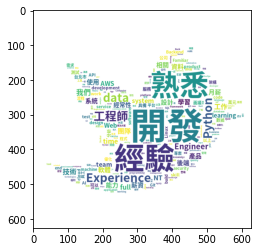

In [ ]:
import jieba
import jieba.analyse
from urllib.request import urlretrieve
import pandas as pd
import csv

url = "https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big"
urlretrieve(url, 'bigdict.txt')
jieba.load_userdict('bigdict.txt')

f = open('Yourator_python.csv', errors='ignore', encoding='utf-8').read()

wordlist = jieba.cut(f)
words = ' '.join(wordlist)

from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
mask_path = 'M2jeo.jpg'
mask = np.array(Image.open(mask_path))
wc = WordCloud(font_path='NotoSansCJKtc-Bold.otf',
        background_color='white',
        max_words=5000,
        mask=mask,
        collocations=False)
wc.generate(words)
color = ImageColorGenerator(mask)
wc.recolor(color_func=color)
wc.to_file('cloud.png')
plt.imshow(wc)